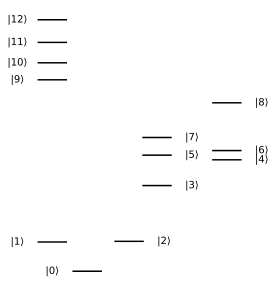

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import qutip
import numpy as np
import qutip
import scqubits
from scipy.optimize import minimize
from IPython.display import clear_output

from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.drive import *
from CoupledQuantumSystems.evo import ODEsolve_and_post_process
from CoupledQuantumSystems.noise import *
from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.IFQ import gfIFQ

def visualize_c_ops(c_ops,evals):
    level_to_x = {
        0:0.5,
        1:0,
        2:1.1,
        3:1.5,
        4:2.5,
        5:1.5,
        6:2.5,
        7:1.5,
        8:2.5,
        9:0,
        10:0,
        11:0,
        12:0,
        13:0,
        14:1.5,
        15:2.5,
        16:3.5,
        17:4.5,
        18:5.5,
        19:6.5,
    }
    def plot_levels(ax):
        for ql,eval in enumerate(evals):
            eval_with_2pi = 2*np.pi*eval
            x = level_to_x[ql]
            length = 0.2
            ax.plot([x-length,x+length], [eval_with_2pi,eval_with_2pi], color = 'black')
            if x <= 1:
                x_label = x-0.5
            else:
                x_label = x+0.5
            ax.text(x_label,eval_with_2pi,rf"$|{ql}\rangle$",va='center',ha='center',fontsize=10)
    def plot_thermalization(ax):
        max_element = np.max(np.abs(np.square((c_ops.full()))))
        max_lw = 4
        lw_scaling_ratio = max_lw/max_element
        decay_color = '#4999c3'
        heating_color = '#d5373d'
        for i in range(len(evals)):
            for j in range(len(evals)):
                if i == j:
                    continue
                else:
                    i_y = 2*np.pi*evals[i]
                    j_y = 2*np.pi*evals[j]
                    i_x = level_to_x[i]
                    j_x = level_to_x[j]
                    lw = lw_scaling_ratio* np.abs(np.square((c_ops[i,j])))
                    if lw > 0.01:
                        if i < j:
                            ax.plot([i_x+0.1,j_x+0.1], [i_y,j_y], color = decay_color , lw = lw )
                        else:
                            ax.plot([i_x-0.1,j_x-0.1], [i_y,j_y], color = heating_color , lw = lw )
    fig, ax = plt.subplots(1,1,figsize = (4,5))
    plot_levels(ax)
    # plot_thermalization(ax)
    return fig,ax
temp_in_mK = 20
loss_tangent_ref = 5e-6
one_over_f_flux_noise_amplitude = 1e-6

EJ = 4
EC = EJ/2.7
EL = EJ/45

qbt_large = gfIFQ(EJ = EJ,EC =EC,EL = EL,truncated_dim=13)

t_duration = 50
tlist = np.linspace(0,t_duration,t_duration)

c_ops=qbt_large.get_T1_c_ops(temp_in_mK,
                        loss_tangent_ref,
                        one_over_f_flux_noise_amplitude)
evals = qbt_large.fluxonium.eigenvals(evals_count=qbt_large.truncated_dim)

fig,ax  = visualize_c_ops(c_ops,evals)
ax.set_ylabel(f"$\omega$ (GHz)")
ax.set_xlabel(f"$\phi/2\pi$")
plt.axis('off')
fig.savefig('level.pdf')